# 四种：水，草，土，白云

In [1]:
import numpy as np
from skimage import io

img = io.imread(r'D:\Projects\VsCode\Python\img_processing_system\osgeopy-data\Landsat\Utah\LE70380322000181EDC02_60m.tif')
print(img.shape)
rows, cols, bands = img.shape
print(rows, cols, bands)
classes = {'cloud': 0, 'vegetation': 1, 'water': 2, 'bare land': 3}
n_classes = len(classes)
palette = np.uint8([
    [255, 255, 255], 
    [0, 255, 0], 
    [160, 120, 90],
    [0, 0, 255],
    ])

(3631, 3996, 3)
3631 3996 3


In [2]:
from sklearn.cluster import KMeans

X = img.reshape(rows*cols, bands)
print("X.shape: ",X.shape)
kmeans = KMeans(n_clusters=n_classes, random_state=3).fit(X)
print(kmeans.labels_)
print(np.unique(kmeans.labels_))
unsupervised = kmeans.labels_.reshape(rows, cols)

X.shape:  (14509476, 3)


Exception in thread Thread-4 (_readerthread):
Traceback (most recent call last):
  File "d:\Projects\VsCode\Python\img_processing_system\.conda\Lib\threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "d:\Projects\VsCode\Python\img_processing_system\.conda\Lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "d:\Projects\VsCode\Python\img_processing_system\.conda\Lib\threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "d:\Projects\VsCode\Python\img_processing_system\.conda\Lib\subprocess.py", line 1599, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "<frozen codecs>", line 322, in decode
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 4: invalid continuation byte


[0 0 0 ... 0 0 0]
[0 1 2 3]


In [3]:
print(type(palette[unsupervised]))
print(palette[unsupervised].shape)
print(palette[unsupervised])


<class 'numpy.ndarray'>
(3631, 3996, 3)
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


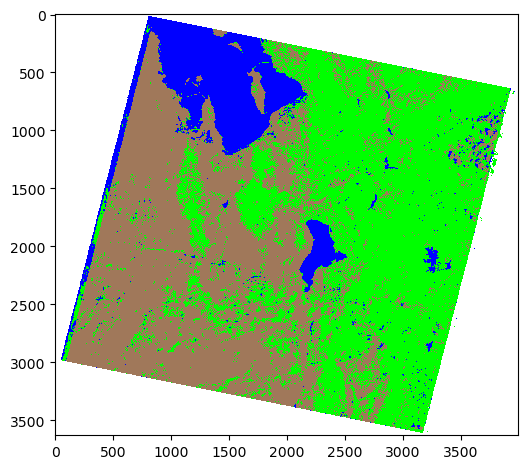

In [4]:
# 问题：为什么图中只有三种颜色，我在palette中定义了四种颜色啊
io.imshow(palette[unsupervised])